/tmp/ipykernel_9908/2159131622.py:86: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_9908/2159131622.py:92: UserWarning:

Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from font(s) DejaVu Sans.

/tmp/ipykernel_9908/2159131622.py:92: UserWarning:

Glyph 127469 (\N{REGIONAL INDICATOR SYMBOL LETTER H}) missing from font(s) DejaVu Sans.

/tmp/ipykernel_9908/2159131622.py:92: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/home/monamin/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from font(s) DejaVu Sans.

/home/monamin/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 127469 (\N{REGIONAL INDICATOR SYMBOL LETTER H}) missing from font(s) DejaVu Sans.

/ho

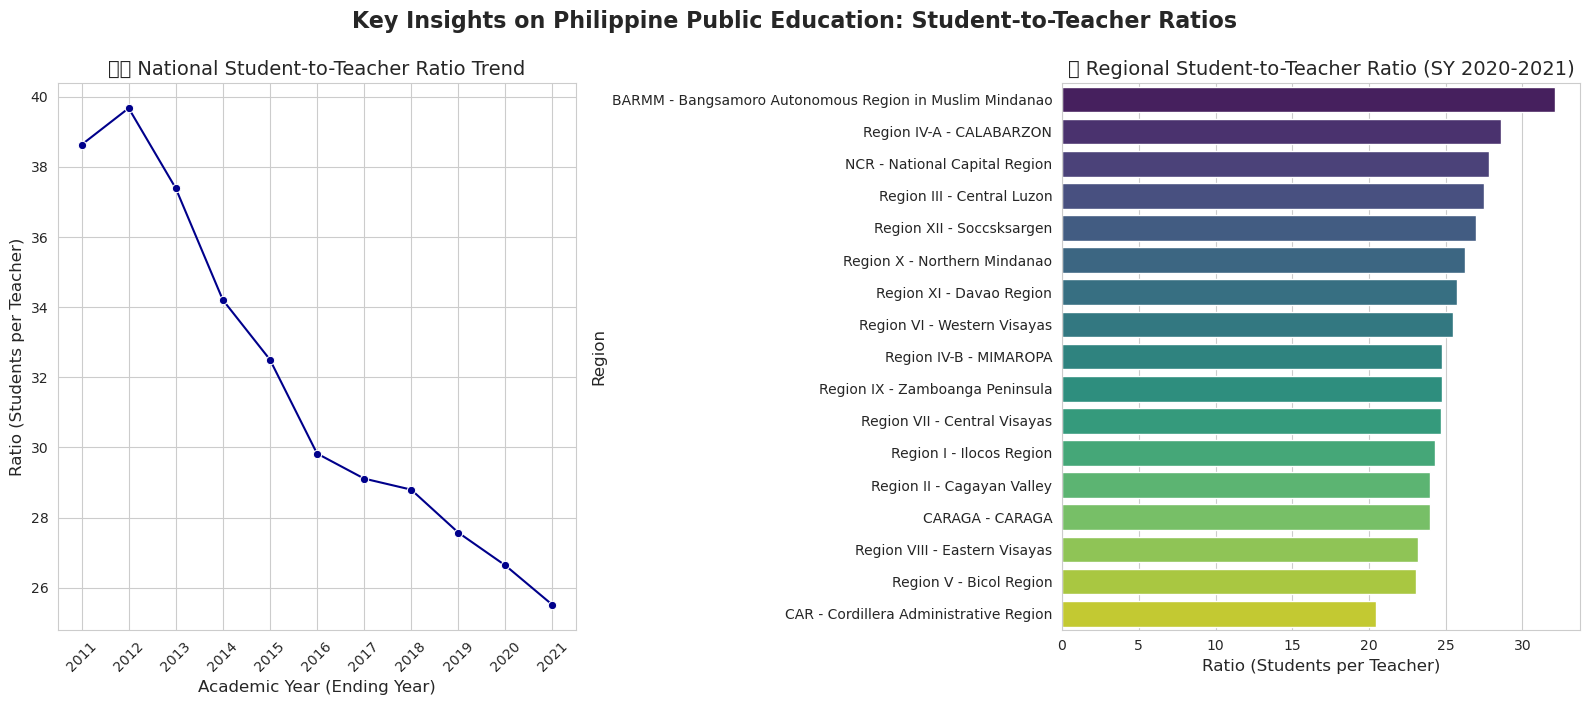

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# Load the dataset
file_path = "/home/monamin/Documents/00001_Repositories/OOP-school-rep/67 AMOGUS/dataset.csv"
df = pd.read_csv(file_path)


# A. Calculate Total Enrollment and Teachers
enrollment_cols = [col for col in df.columns if col.startswith('Enrollees_')]
teacher_cols = ['Teachers_Elementary', 'Teachers_JHS', 'Teachers_SHS']

df['Total_Enrollees_All_Levels'] = df[enrollment_cols].sum(axis=1)
df['Total_Teachers'] = df[teacher_cols].sum(axis=1)
df['Student_Teacher_Ratio'] = df.apply(
    lambda row: row['Total_Enrollees_All_Levels'] / row['Total_Teachers'] if row['Total_Teachers'] > 0 else 0,
    axis=1
)

# B. Summarize data for national time-series analysis
national_summary = df.groupby('Academic_Year').agg({
    'Student_Teacher_Ratio': 'mean'
}).reset_index()
national_summary['End_Year'] = national_summary['Academic_Year'].str.split('-').str[1].astype(int)
national_summary = national_summary.sort_values('End_Year')

# C. Prepare Enrollment by Level Data (for Distribution Shift)
elem_cols = [f'Enrollees_G{i}' for i in range(1, 7)] + ['Enrollees_K']
jhs_cols = [f'Enrollees_G{i}' for i in range(7, 11)]
shs_cols = [col for col in df.columns if col.startswith('Enrollees_G11') or col.startswith('Enrollees_G12')]

enrollment_level_summary = df.groupby('Academic_Year')[elem_cols + jhs_cols + shs_cols].sum().reset_index()
enrollment_level_summary['Total_Elementary'] = enrollment_level_summary[elem_cols].sum(axis=1)
enrollment_level_summary['Total_JHS'] = enrollment_level_summary[jhs_cols].sum(axis=1)
enrollment_level_summary['Total_SHS'] = enrollment_level_summary[shs_cols].sum(axis=1)
enrollment_level_summary['Total_Overall'] = enrollment_level_summary[['Total_Elementary', 'Total_JHS', 'Total_SHS']].sum(axis=1)


enrollment_level_summary['Pct_Elementary'] = (enrollment_level_summary['Total_Elementary'] / enrollment_level_summary['Total_Overall']) * 100
enrollment_level_summary['Pct_JHS'] = (enrollment_level_summary['Total_JHS'] / enrollment_level_summary['Total_Overall']) * 100
enrollment_level_summary['Pct_SHS'] = (enrollment_level_summary['Total_SHS'] / enrollment_level_summary['Total_Overall']) * 100


plot_distribution_df = enrollment_level_summary[['Academic_Year', 'Pct_Elementary', 'Pct_JHS', 'Pct_SHS']].copy()
plot_distribution_df['End_Year'] = plot_distribution_df['Academic_Year'].str.split('-').str[1].astype(int)
plot_distribution_df = plot_distribution_df.sort_values('End_Year').set_index('End_Year').drop(columns=['Academic_Year'])


df_long_sns = pd.melt(
    plot_distribution_df.reset_index(),
    id_vars=['End_Year'],
    value_vars=['Pct_Elementary', 'Pct_JHS', 'Pct_SHS'],
    var_name='Education_Level',
    value_name='Enrollment_Percentage'
)

level_map_sns = {
    'Pct_Elementary': 'Elementary (K-G6)',
    'Pct_JHS': 'Junior High School (G7-G10)',
    'Pct_SHS': 'Senior High School (G11-G12)'
}
df_long_sns['Education_Level'] = df_long_sns['Education_Level'].replace(level_map_sns)

sns.set_style("whitegrid")

#figure 1
plt.figure(figsize=(16, 7))
latest_ay = df['Academic_Year'].max()
latest_data = df[df['Academic_Year'] == latest_ay].sort_values('Student_Teacher_Ratio', ascending=False)


plt.subplot(1, 2, 1)
sns.lineplot(
    x='End_Year', y='Student_Teacher_Ratio', data=national_summary, marker='o', color='darkblue'
)
plt.title('🇵🇭 National Student-to-Teacher Ratio Trend', fontsize=14)
plt.xlabel('Academic Year (Ending Year)', fontsize=12)
plt.ylabel('Ratio (Students per Teacher)', fontsize=12)
plt.xticks(national_summary['End_Year'], rotation=45)


plt.subplot(1, 2, 2)
sns.barplot(
    x='Student_Teacher_Ratio', y='Region', data=latest_data, palette='viridis'
)
plt.title(f'📊 Regional Student-to-Teacher Ratio ({latest_ay})', fontsize=14)
plt.xlabel('Ratio (Students per Teacher)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Key Insights on Philippine Public Education: Student-to-Teacher Ratios", fontsize=16, fontweight='bold', y=1.0)
plt.show()


#figure 2
plot_df = enrollment_level_summary[['Academic_Year', 'Pct_Elementary', 'Pct_JHS', 'Pct_SHS']].copy()
plot_df['End_Year'] = plot_df['Academic_Year'].str.split('-').str[1].astype(int)

df_long_px = pd.melt(
    plot_df,
    id_vars=['End_Year'],
    value_vars=['Pct_Elementary', 'Pct_JHS', 'Pct_SHS'],
    var_name='Education_Level',
    value_name='Enrollment_Percentage'
)


df_plotly = df_long_px.copy().rename(columns={
    'End_Year': 'Academic Year (End Year)',
    'Education_Level': 'Education Level',
    'Enrollment_Percentage': 'Percentage of Total Enrollees (%)'
})


level_map = {
    'Pct_Elementary': 'Elementary (K-G6)',
    'Pct_JHS': 'Junior High School (G7-G10)',
    'Pct_SHS': 'Senior High School (G11-G12)'
}
df_plotly['Education Level'] = df_plotly['Education Level'].replace(level_map)

fig = px.line(
    df_plotly,
    x='Academic Year (End Year)',
    y='Percentage of Total Enrollees (%)',
    color='Education Level',
    title='Interactive Enrollment Percentage Share by Education Level',
    markers=True,
    color_discrete_map={
        'Elementary (K-G6)': '#4c72b0',
        'Junior High School (G7-G10)': '#55a868',
        'Senior High School (G11-G12)': '#c44e52'
    }
)


fig.update_layout(
    hovermode='x unified',
    xaxis_title='Academic Year (End Year)',
    yaxis_title='Percentage of Total Enrollees (%)',
    xaxis={'tickmode': 'array', 'tickvals': df_plotly['Academic Year (End Year)'].unique()}
)
fig.show()



### The analysis of the Student-to-Teacher Ratio data reveals significant national improvements countered by persistent regional inequalities.

1. **National Trend: Consistent Improvement**<br>
The line plot showing the national average STR trend implies a strong and sustained improvement in resource allocation over the decade (2010 to 2021).

- **The Line's Implication**: The ratio consistently slopes downward, decreasing from approximately 33–34 students per teacher in the early years to below 30 in the final year of the dataset. A decreasing ratio signals better learning conditions and improved teacher availability relative to the student population.

- **What Happened**: This improvement is primarily the result of the government's investment in education, particularly the mass hiring of new teachers associated with the roll-out of the K-12 Basic Education Program. The hiring rate successfully outpaced the natural growth in student enrollment.

2. **Regional Comparison: Persistent Inequality**<br>
The bar plot comparing STRs across regions for the latest year (AY 2020-2021) highlights a severe disparity in classroom resources.

- **The Highest Ratios (Worst Conditions)**: The regions with the highest STRs are the most densely populated and fastest-growing economic centers: the National Capital Region (NCR) and Region IV-A (CALABARZON). This suggests that the speed of urbanization and population growth in these areas is so rapid that teacher hiring efforts cannot keep pace, leading to the most crowded classrooms.

- **The Lowest Ratios (Best Conditions)**: Conversely, the regions with the best STRs (lowest bars) are typically those with lower population density, such as the Cordillera Administrative Region (CAR) and other select provinces. This indicates a relatively better distribution of teaching resources per student in these areas.

### The dramatic change in the curves is due to the complete application of the K-12 Curriculum.

**What happened?**<br>
The huge shift that started in the academic year 2016-2017 and is clearly seen in the graph (figure 2) is the result of the mandatory introduction of Grade 11 (the first year of SHS) in all public schools in the country during that year.

**Cause**<br> The transition from a 10-year to a 12-year basic education cycle resulted in the influx of students to the newly created grades of G11 and G12, thus the student body was doubled.

**Effect on SHS (the spike)**<br> The line showing the Senior High School (G11-G12) enrollment jumps from nearly zero (where only pilot testing was done) to more than 10% since these two new grades were included in the total student count. They absorbed a large portion of all enrollees immediately due to the students being added overnight.

**Effect on Elementary/JHS (the decline)**<br> The proportion of Elementary and JHS levels decreased slightly, as the total enrolment pie got bigger due to the inclusion of SHS. Hence, even though their absolute student numbers continued to rise, their percentage of the new, larger total enrollment pool decreased only slightly.

So, in conclusion, the graph is an excellent data representation of the K-12 program taking full effect and making a permanent change in the structure of public school enrollment in the Philippines.

/tmp/ipykernel_9908/2839252152.py:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




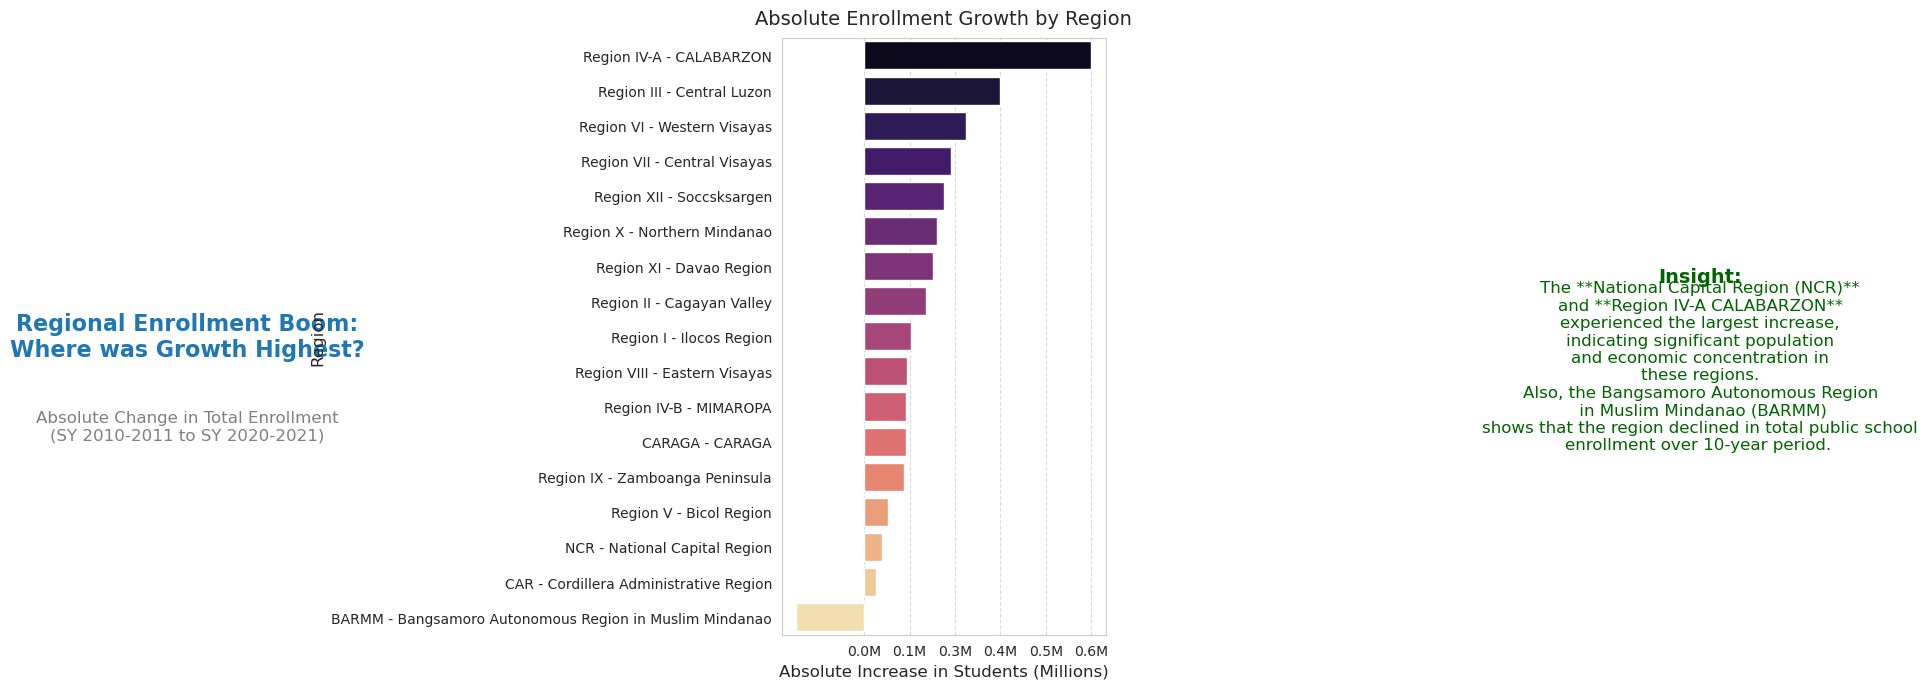

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = "/home/monamin/Documents/00001_Repositories/OOP-school-rep/67 AMOGUS/dataset.csv"
df = pd.read_csv(file_path)

enrollment_cols = [col for col in df.columns if col.startswith('Enrollees_')]
df['Total_Enrollees'] = df[enrollment_cols].sum(axis=1)

start_ay = 'SY 2010-2011'
end_ay = 'SY 2020-2021'

df_start = df[df['Academic_Year'] == start_ay].groupby('Region')['Total_Enrollees'].sum().reset_index()
df_end = df[df['Academic_Year'] == end_ay].groupby('Region')['Total_Enrollees'].sum().reset_index()

growth_df = pd.merge(df_start, df_end, on='Region', suffixes=('_start', '_end'))
growth_df['Absolute_Growth'] = growth_df['Total_Enrollees_end'] - growth_df['Total_Enrollees_start']


growth_df = growth_df.sort_values('Absolute_Growth', ascending=False)

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 7), gridspec_kw={'width_ratios': [1, 3, 1]})


axes[0].text(0.5, 0.5,
             "Regional Enrollment Boom:\nWhere was Growth Highest?",
             ha='center', va='center', fontsize=16, fontweight='bold', color='#1f77b4')
axes[0].text(0.5, 0.35,
             f"Absolute Change in Total Enrollment\n({start_ay} to {end_ay})",
             ha='center', va='center', fontsize=12, color='gray')
axes[0].axis("off")



sns.barplot(
    x='Absolute_Growth',
    y='Region',
    data=growth_df,
    ax=axes[1],
    palette='magma'
)
axes[1].set_title("Absolute Enrollment Growth by Region", fontsize=14, pad=10)
axes[1].set_xlabel("Absolute Increase in Students (Millions)", fontsize=12)
axes[1].set_ylabel("Region", fontsize=12)


max_growth = growth_df['Absolute_Growth'].max()
ticks = np.linspace(0, max_growth, 6)
axes[1].set_xticks(ticks)
axes[1].set_xticklabels([f'{x/1000000:.1f}M' for x in ticks], rotation=0)
axes[1].grid(axis='x', linestyle='--', alpha=0.7)



axes[2].text(0.5, 0.6,
             "Insight:",
             ha='center', va='center', fontsize=14, fontweight='bold', color='darkgreen')
axes[2].text(0.5, 0.45,
             "The **National Capital Region (NCR)**\nand **Region IV-A CALABARZON**\nexperienced the largest increase,\nindicating significant population\nand economic concentration in\nthese regions.\nAlso, the Bangsamoro Autonomous Region\n in Muslim Mindanao (BARMM)\nshows that the region declined in total public school\nenrollment over 10-year period. ",
             ha='center', va='center', fontsize=12, color='darkgreen')
axes[2].axis("off")


plt.tight_layout()

### A storyboard that illustrates the Absolute Enrollment Growth by Region about the changing populations and the difficulties that the Philippine public school system went through between AY 2010-2011 and AY 2020-2021.


1. **The Implication: Growth is Highly Concentrated**<br>
    
    The information reveals that the increase in the student population is not spread out evenly all over the Philippines, but rather, it is highly concentrated in certain places where the economy is booming.

    **The Lines/Bars Show:** The bulk of absolute growth was registered in only a few regions, mirroring the national waves of migration and urbanization.

2. **What Happened (The Major Growth):**<br>
    
    Biggest regions bars mean the biggest volume of new students.<br>

    Highest Growth Regions: NCR and IV-A (CALABARZON) are the two regions that topped the list, with a significant margin in between.<br>

    **What Happened**:<br> This growth concentration is evidence of the rapid internal migration and urbanization. People who move to areas offering better job opportunities (such as Metro Manila and its nearby industrial provinces) not only increase their numbers but also draw the public school system in these regions to the limit.

3. **What Happened (The Key Exception):**
    The negative bar is the most astonishing finding.<br>

    - **Net Decline:** BARMM (formerly known as ARMM in the source data) is the only region where the bar has moved to the left, which means a decrease in total public school enrollment over the decade.<br>

    **What Happened:** The loss of over 8,500 students in this region may signal a shrinking of the public school student base. This may be caused by a variety of factors such as:

    - Displacement internally or migrant out of the area because of instability (political, economic) or social reason.

    - (Above) changes in the region's transition from private to public schooling or alternative learning modes.

    - Administratively and as a result of the region's transition from ARMM to BARMM changes in reporting.

The amount of space taken by each bar means the net addition or loss of students in the particular region during the ten years period.
To conclude, the graph shows a scenario where the education system is dealing with tremendous growth in metropolitan areas while at the same time managing a reduction in the number of students in one of the autonomous regions.